In [1]:
#include <iostream>

using namespace std;

# Lambda Functions in C++

C++ Lambdas are an important feature in modern C++, 

Lambdas are fancy name for anonymous function object which are used widely for writing in-place functions (i.e, right at the location where it is invoked or passed as an argument to a function) and generally enhances the functionality of C++.

A lambda consists typically of three parts: 
1. a capture list ```[]```, 
2. an optional parameter list ```()``` and 
3. a body ```{}```; 

the expression ```[](){}();```

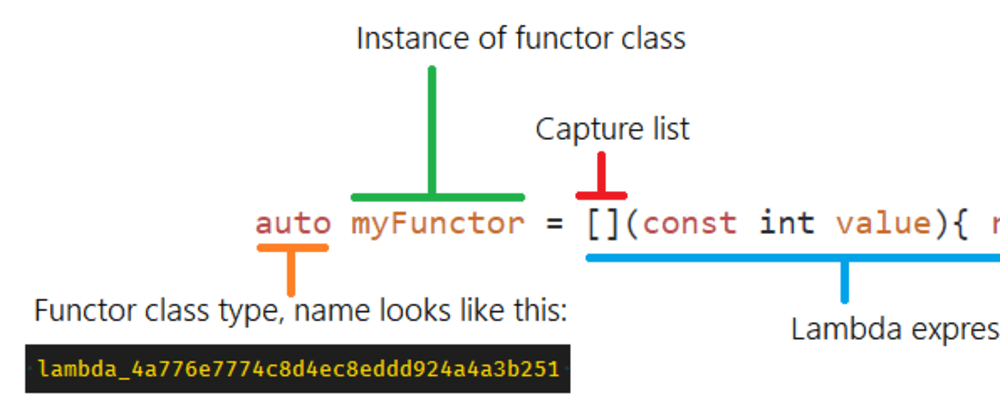

The basic prototype of lambda expressions is the following.

```
[capture clause] (parameters) -> return-type
{       
    // body
}
```

- capture clause - these are variables that are copied inside the lambda to be used in the code.
- parameters - these are the arguments that are passed to the lambda at execution time.
- body - the body of the function, which is the same as in regular functions.
- return-type - return type of the function.

In [3]:
auto addition = [](int x, int y) { return x + y; };

cout << addition(2,3) << endl;

5


## Motivation behind lambda functions

- to provide flexible and convenient means to define unnamed function objects (functors) for STL algorithms.

Typically STL algorithms operate on container elements via function objects, these function objects are passed as arguments to the algorithms.

- C++11 introduces lambdas allow you to write an inline, anonymous functor to replace bulky codes

#### Example of how an inline lambda is expanded by the compiler

**Lambda Expression**:
```
std::vector<int> vec{10, 20, 30, 40, 50};
    int addNum = 100;
    std::for_each(vec.begin(), vec.end(), [&addNum](int x)
                  { std::cout << addNum + x << ' '; });
```

**Its Expansion**: 
The compiler replaces the line std::for_each(vec.begin(), vec.end(), [](int x) { std::cout << x << ' ';}); for the above code as:

```
class anonymous
{
private:
    int &addNum;

public:
    anonymous(int &_addNum) : addNum(_addNum) {}
    inline auto operator()(int x) const
    {
        std::cout << addNum + x << ' ';
    }
};

int addNum = 100;
std::for_each(vec.begin(), vec.end(), anonymous(addNum));
```

The compiler generates an unique closure object (or function object) to be replaced as an argument inside for_each function. 

Capture list will become a constructor argument inside the closure class and the lambda parameters(as received from the vector iterator) will become an argument to operator().

## Lambda capture list

| Capture lists       | Description                                                                                                      |
|---------------------|------------------------------------------------------------------------------------------------------------------|
| ```[]```            | Empty capture list, nothing will be captured.                                                                    |
| ```[foo]```         | Capture foo by copy.                                                                                             |
| ```[&bar]```        | Capture bar by reference.                                                                                        |
| ```[foo, &bar]```   | Capture foo by-copy and bar by-reference.                                                                        |
| ```[=]```           | Capture anything named from the enclosing scope by-copy.                                                         |
| ```[&]```           | Capture anything named from the enclosing scope by-reference.                                                    |
| ```[&, foo, bar]``` | Capture anything named from the enclosing scope by reference, except foo and bar which must be captured by-copy. |
| ```[=, &foo]```     | Capture anything named from the enclosing scope by copy, except foo which must be captured by-reference          |

#### Capturing member variables inside lambda function (how to do it inside a class)

If you try to capture member variable directly by value or reference, then it will not work
```
class addVector
{
    // vector sum
    int sum = 0;
public:
    int getSum()
    {
        return sum;
    }
    void update(std::vector<int>& vec)
    {
        // Capturing member variable by value will not work
        // Will result in Compile Error
        std::for_each(vec.begin(), vec.end(), [sum](int element){
                sum += element; // Accessing member variable from outer scope
        });
    }
};
```

since sum is a non-static member variable, It will result in compile error. Hence, to capture the member variables inside lambda function, capture the this pointer by value.

```
std::for_each(vec.begin(), vec.end(), [this](int element){
    sum += element;
}
```


## Lambda return type

Often, the return type does not need to be specified because the compiler can deduce it.

The compiler can easily deduce the return type if you only have one return statement. 

If a lambda body does not have a return statement, the lambda’s return type is void. 

If a lambda body consists of just a single return-statement, the lambda’s return type is the type of the return’s expression. 

It may be necessary or preferable to specify it explicitly for more complex lambdas.

```auto func = [](int i){ return i; }; // return type is int```

#### mutable keyword for lambda

The lambda function call operator is const expression; which means lambda requires mutable keyword to modify any capture by value variable inside a capture list.

For instance, the below code throws compiler error
```
int val;
auto bad_lambda = [val]() { val += 100; };  //Here val is passed as a const reference
```

The copy captures can be made writable if the lambda is declared as ```mutable```; any change you do to the copy capture will be carried over to the next execution of the same lambda.


In [4]:
int val{100};

auto good_lambda = [val]() mutable {
    std::cout << val++ << std::endl;
};

// the lambda remembers the state of the closure object
good_lambda(); // prints 100
good_lambda(); // prints 101
good_lambda(); // prints 102

// the original variable outside of the lambda is unchanged
std::cout << val << std::endl; // prints 100

input_line_11:3:1: warning: captures will be by reference, not copy
auto good_lambda = [val]() mutable {
^


100
101
102
100


@0x7fd742402de0

## Naming a Lambda Function

There are three possible ways to give lambda a name.

1.  Using std::function<>

we can use std::function<> to hold the function pointer. The below code snippet uses std::function<> which takes integer as function argument.



In [5]:
std::function<void(int)> print = [](int val)
{
    std::cout << val << std::endl;
};
// calling lambda function with explicit std::function handler
print(100);

100


2. Using auto keyword

The lambda can be simply assigned a name by using C++ auto keyword; this is the simplest way of assigning a name to a lambda.

In [6]:
auto print = [](int val)
{
    std::cout << val << std::endl;
};
// calling lambda function 
print(100);

100


3. Using C function pointers

Lambdas are just functions and can be assigned to a 'C' style function pointers; this is seriously discouraged.

In [7]:
void(*print)(int) = [](int val)
{
    std::cout << val << std::endl;
};
// calling function pointer
print(100);

100


## Immediately invoke a C++ lambda (IIFE)

An immediately invoked function expression (IIFE) is a function, which runs as soon as it is created

Since lambdas are kept anonymous, they are used and forgotten immediately. 

It is good way of declaring variables and executing code without polluting the global namespace.

The parenthesis immediately following the closing braces invokes the function immediately and hence the name immediately invoking function expression.

Example: [LINK](../volansys_cpp_advanced/18_Lambda_Expressions/IIFE.cpp)

## Assembly code generated by the lambda

Whether or not you capture variables, the assembler code is the same as for a regular class. The only exception is that when capturing variables, the function Object() is inlined because it will not be used again.

Finally, Lambda functions are very useful, even necessary, for effective use of modern C++ libraries and offer a clean and concise alternative to writing functions. They can be declared in various ways based on the needs of the users by utilizing capture clauses, parameters and return type(which are optional).

# All About Lambda Functions in C++ (From C++11 to C++17)

*lambda doesn't always synthesize to function pointer.*

It's an expression (precisely unique closure).

## Learning Lambda Expressions

#### Capture by Reference/Value


In [9]:
int x = 100, y = 200;

auto print = [&] { // Capturing object by reference
    std::cout << __PRETTY_FUNCTION__ << " : " << x << " , " << y << std::endl;
};

print();

auto __cling_Un1Qu310(void *)::(anonymous class)::operator()() const : 100 , 200


#### Passing Lambda as a Parameter



In [11]:
template <typename Functor>
void f(Functor functor)
{
    std::cout << __PRETTY_FUNCTION__ << std::endl;
}
/* Or alternatively you can use this
void f(std::function<int(int)> functor)
{
    std::cout << __PRETTY_FUNCTION__ << std::endl;
} 
*/

int g() { static int i = 0; return i++; }



In [12]:
auto lambda_func = [i = 0]() mutable { return i++; };
f(lambda_func); // Pass lambda
f(g);           // Pass function

input_line_22:2:2: warning: captures will be by reference, not copy
 auto lambda_func = [i = 0]() mutable { return i++; };
 ^


void __cling_N512::f(Functor) [Functor = (lambda at input_line_22:2:21)]
void __cling_N512::f(Functor) [Functor = int (*)()]


#### Capture Member Variable in Lambda or This Pointer 

In [13]:
class Example
{
public:
    Example() : m_var(10) {}
    void func()
    {
        [=]() { std::cout << m_var << std::endl; }(); // IIFE
    }
private:
    int m_var;
};

Example e;
e.func();

10


```this``` pointer can also be captured using ```[this], [=] or [&].``` In any of these cases, class data members(including private) can be accessed as you do in a normal method. 


## C++ Lambda Function Types

1. Generic Lambda
2. Variadic Generic Lambda : [LINK](../volansys_cpp_advanced/18_Lambda_Expressions/variadic_lambda.cpp)
    + Lambda with a variable parameter pack will be useful in many scenarios like debugging, repeated operation with different data input, etc.
3. Mutable Lambda Function
4. Lambda as a Function Pointer : [LINK](../volansys_cpp_advanced/18_Lambda_Expressions/lambda_as_func_pointer.cpp)
5. Higher-Order Returning Lambda Functions: [LINK](../volansys_cpp_advanced/18_Lambda_Expressions/higher_order_returning_lambdas.cpp)
6. Constexpr Lambda Expression: Since C++17, a lambda expression can be declared as constexpr.

In [17]:
constexpr auto sum = [](const auto &a, const auto &b) { return a + b; };
/*
    is equivalent to
    constexpr struct anonymous
    {
        template <class T1, class T2>
        constexpr auto operator()(T1 a, T2 b) const
        {
            return a + b;
        }
    };
*/
constexpr int answer = sum(10, 10);

cout << answer <<endl;

20


# Stateless Lambdas can be default-constructed and copy-assigned

A stateless lambda is a lambda that captures nothing from its environment. 

Or, to put it the other way around. A stateless lambda is a lambda where the initial brackets [] in the lambda definition are empty.

For example, the lambda expression ```auto add = [ ](int a, int b) { return a + b; };``` is stateless.





# Using Lambdas — A Practical Example

Lambdas are not often used on their own as shown in the examples above. 

Instead, lambdas prove most useful when used in combination with an algorithm from the STL.


1. Example 1: The first example demonstrates how to use a lambda with the sort function. This function will sort the contents of a container (in this example a vector) into order. The default order is ascending order. But what if we want to sort the vector into descending order? It turns out the sort function takes an optional third argument which can be a function object, or for our purposes, a lambda. We can use this to change the order of the sort so that the order is descending instead of ascending.

In [18]:

#include <vector>
#include <algorithm>
template <typename T>
void print_vector(std::vector<T> vec) {
  for (T element : vec) {
    std::cout << element << " ";
  }
}


In [19]:
std::vector<int> numbers {3,1,2,5,4};
  print_vector(numbers);
  std::cout << std::endl;
  sort(numbers.begin(), numbers.end(),
    [](int a, int b){ return a > b; }); //This is the lambda function which enables the descending sort
  //The lambda function is used as a comparator function, determining the order in which elements should be sorted. 
  //The lambda function takes two integers a and b as parameters and returns a boolean value. 
  //The sort algorithm uses this boolean value to determine whether a should go before b in the sorted sequence.
  std::cout << std::endl;
  print_vector(numbers);

3 1 2 5 4 

5 4 3 2 1 

the lambda function effectively tells std::sort to sort the elements in descending order because it returns true when the first element (a) is greater than the second element (b). The sort algorithm uses this information to arrange the elements accordingly.

2. Example 2: Another STL function used quite often is for_each. This function takes a range of data in a container and performs some task on each element in that range. Let’s use this function to display the vector data in the example above.


In [21]:
std::vector<int> numbers {3,1,2,5,4};
sort(numbers.begin(), numbers.end(),
  [](int a, int b){ return a > b; });
for_each(numbers.begin(), numbers.end(),
  [](auto &element) { std::cout << element << " ";});

5 4 3 2 1 